# Association Rules for Market Basket Analysis

In [38]:
import pandas as pd
from apyori import apriori

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
store_data = pd.read_csv('groceries.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
store_data.shape

(9835, 32)

In [18]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

In [26]:
des = store_data.describe()
des.

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,chocolate,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


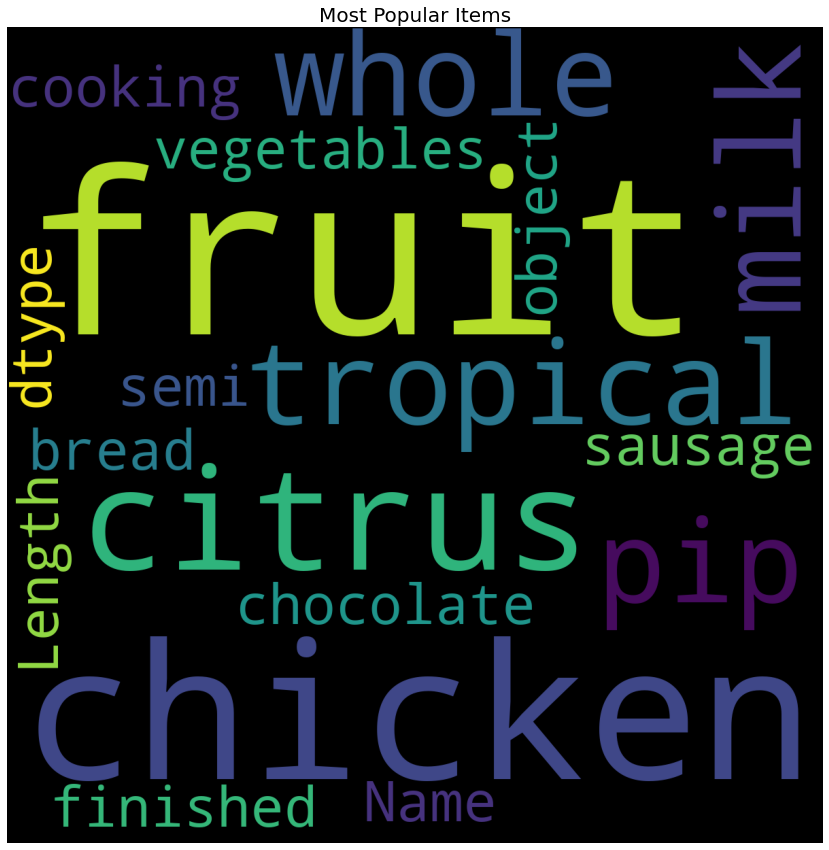

In [13]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(str(store_data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

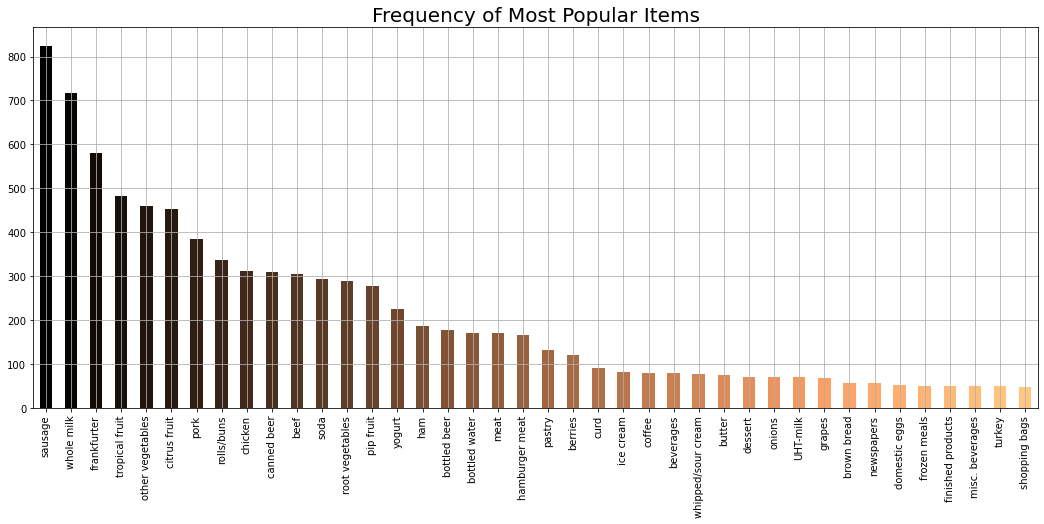

In [15]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
store_data[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of Most Popular Items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list.

In [6]:
records = []
for i in range(store_data.shape[0]):
    records.append([str(store_data.values[i,j]) for j in range(store_data.shape[1])])

In [7]:
min_support = 70/store_data.shape[0]

In [8]:
association_rules = apriori(records, min_support= min_support, min_confidence=0.3, min_lift=3, min_length=2)
association_results = list(association_rules)

In [9]:
association_results[0]

RelationRecord(items=frozenset({'beef', 'root vegetables'}), support=0.017386883579054397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'root vegetables'}), confidence=0.3313953488372093, lift=3.0403668431100312)])

In [11]:
for item in association_results:

    pair = item[0] 
    print("Rule: " + str(pair))
#     items = [x for x in pair]
#     print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: frozenset({'beef', 'root vegetables'})
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: frozenset({'beef', 'root vegetables', 'nan'})
Support: 0.01728520589730554
Confidence: 0.32945736434108525
Lift: 3.0254091300602926
Rule: frozenset({'beef', 'root vegetables', 'other vegetables'})
Support: 0.007930859176410779
Confidence: 0.40206185567010316
Lift: 3.688692491152486
Rule: frozenset({'beef', 'root vegetables', 'whole milk'})
Support: 0.008032536858159633
Confidence: 0.37799043062200954
Lift: 3.467850639148754
Rule: frozenset({'root vegetables', 'citrus fruit', 'other vegetables'})
Support: 0.010371123538383325
Confidence: 0.3591549295774648
Lift: 3.295045459323103
Rule: frozenset({'other vegetables', 'domestic eggs', 'root vegetables'})
Support: 0.007320793085917641
Confidence: 0.32876712328767127
Lift: 3.016254344714783
Rule: frozenset({'other vegetables', 'pip fruit', 'tropical fruit'})
Support: 0.00945602440264362
Confidence: 0.36186